In [44]:
import pandas as pd
import altair as alt
import matplotlib as plt


In [45]:
p_ecoli = pd.read_csv('platanus_ecoli_report.tsv',sep='\t')
p_saur = pd.read_csv('platanus_saureus_report.tsv',sep='\t')
p_afumi = pd.read_csv('platanus_afumi_report.tsv', sep='\t')
p_anthrax = pd.read_csv('platanus_anthrax_report.tsv', sep='\t')
s_ecoli = pd.read_csv('spades_ecoli_report.tsv',sep='\t')
s_saur = pd.read_csv('spades_saureus_report.tsv',sep='\t')
s_afumi = pd.read_csv('spades_afumi_report.tsv', sep='\t')
s_anthrax = pd.read_csv('spades_anthrax_report.tsv', sep='\t')

In [46]:
df= pd.merge(pd.merge(p_ecoli, s_ecoli, on='Assembly'),pd.merge(p_saur, s_saur, on='Assembly'), on='Assembly')
df = pd.merge(df, pd.merge(p_afumi, s_afumi, on='Assembly'),on='Assembly')
df = df.rename(columns={'Assembly':'Assembly','ecoli_out_contig':'p_ecoli','saureus_out_contig':'p_saur','contigs_x':'s_ecoli','contigs_y':'s_saur','afumi_out_contig':'p_afumi','contigs':'s_afumi'})
df.head()

,Assembly,p_ecoli,s_ecoli,p_saur,s_saur,p_afumi,s_afumi
0,# contigs (>= 0 bp),909.0,344.0,604.0,154.0,43663.0,1022.0
1,# contigs (>= 1000 bp),259.0,76.0,102.0,47.0,2027.0,408.0
2,# contigs (>= 5000 bp),182.0,59.0,80.0,39.0,1328.0,341.0
3,# contigs (>= 10000 bp),133.0,53.0,65.0,35.0,892.0,311.0
4,# contigs (>= 25000 bp),67.0,45.0,41.0,26.0,316.0,260.0


In [47]:
df = pd.merge(df, pd.merge(p_anthrax, s_anthrax, on='Assembly'),on='Assembly')
df = df.rename(columns={'out_contig':'p_anth','contigs':'s_anth'})
df.head()

,Assembly,p_ecoli,s_ecoli,p_saur,s_saur,p_afumi,s_afumi,p_anth,s_anth
0,# contigs (>= 0 bp),909.0,344.0,604.0,154.0,43663.0,1022.0,15648.0,88534.0
1,# contigs (>= 1000 bp),259.0,76.0,102.0,47.0,2027.0,408.0,0.0,6017.0
2,# contigs (>= 5000 bp),182.0,59.0,80.0,39.0,1328.0,341.0,0.0,147.0
3,# contigs (>= 10000 bp),133.0,53.0,65.0,35.0,892.0,311.0,0.0,2.0
4,# contigs (>= 25000 bp),67.0,45.0,41.0,26.0,316.0,260.0,0.0,0.0


In [48]:
assemblerkey=['Platanus','Spades']
df = df.set_index('Assembly')
df

,p_ecoli,s_ecoli,p_saur,s_saur,p_afumi,s_afumi,p_anth,s_anth
Assembly,,,,,,,,
# contigs (>= 0 bp),909.00,344.00,604.00,154.00,43663.00,1022.00,15648.00,88534.00
# contigs (>= 1000 bp),259.00,76.00,102.00,47.00,2027.00,408.00,0.00,6017.00
# contigs (>= 5000 bp),182.00,59.00,80.00,39.00,1328.00,341.00,0.00,147.00
# contigs (>= 10000 bp),133.00,53.00,65.00,35.00,892.00,311.00,0.00,2.00
# contigs (>= 25000 bp),67.00,45.00,41.00,26.00,316.00,260.00,0.00,0.00
# contigs (>= 50000 bp),18.00,29.00,13.00,15.00,67.00,182.00,0.00,0.00
Total length (>= 0 bp),4625510.00,4610159.00,2813070.00,2774490.00,29691099.00,28808703.00,2609354.00,30802480.00
Total length (>= 1000 bp),4508909.00,4556970.00,2738143.00,2757497.00,27158034.00,28668064.00,0.00,11978922.00
Total length (>= 5000 bp),4317780.00,4520913.00,2671727.00,2734745.00,25244918.00,28499701.00,0.00,913389.00


In [49]:
df_ecoli = df[['p_ecoli','s_ecoli']]
df_saur = df[['p_saur','s_saur']]
df_afumi = df[['p_afumi','s_afumi']]
df_anth = df[['p_anth','s_anth']]


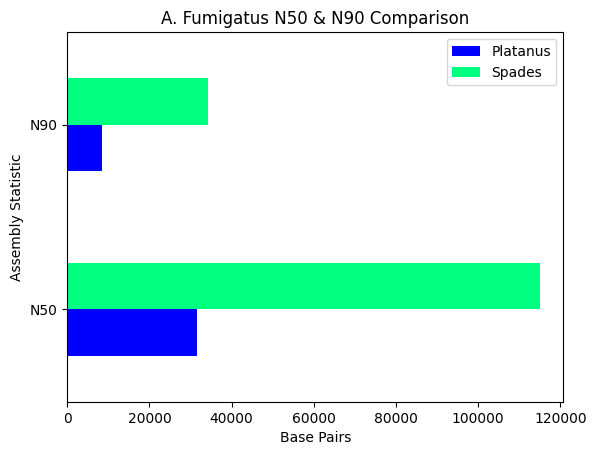

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_ecoli.loc[['N50','N90']].plot.barh(title='A. Fumigatus N50 & N90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Base Pairs')
ax.legend(assemblerkey)
plt.savefig('afumi Ns')

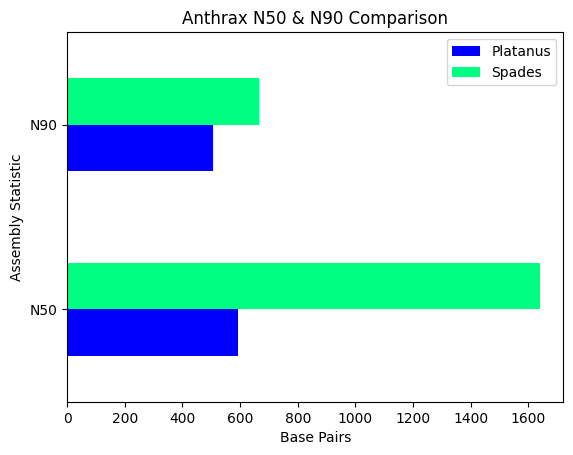

In [51]:
fig, ax = plt.subplots()
df_anth.loc[['N50','N90']].plot.barh(title='Anthrax N50 & N90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Base Pairs')
ax.legend(assemblerkey)
plt.savefig('anth Ns')

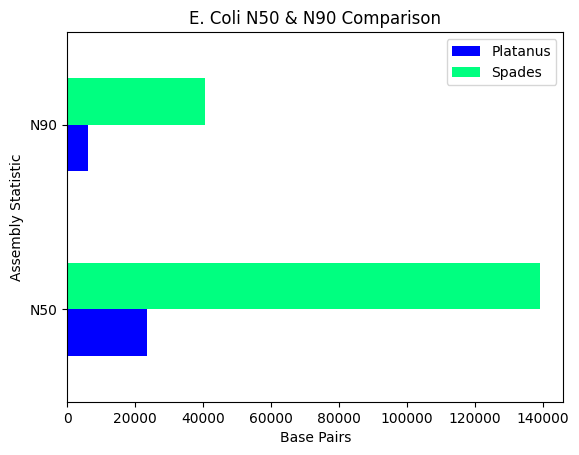

In [52]:
fig, ax = plt.subplots()
df_afumi.loc[['N50','N90']].plot.barh(title='E. Coli N50 & N90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Base Pairs')
ax.legend(assemblerkey)
plt.savefig('ecoli Ns')

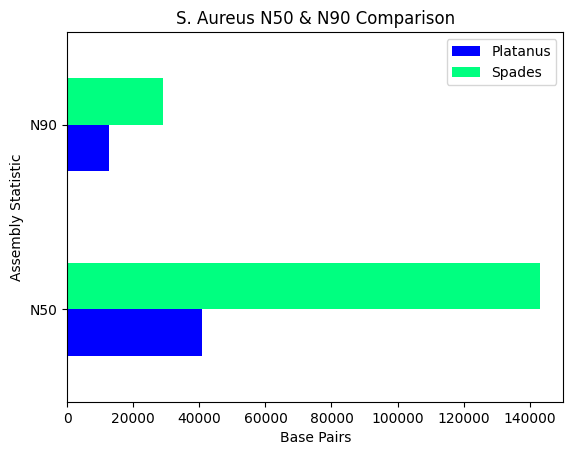

In [53]:
fig, ax = plt.subplots()
df_saur.loc[['N50','N90']].plot.barh(title='S. Aureus N50 & N90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Base Pairs')
ax.legend(assemblerkey)
plt.savefig('saur Ns')

In [54]:
# fig, ax = plt.subplots()
# df_ecoli.loc[['L50','L90']].plot.barh(title='E. Coli L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
# ax.legend(assemblerkey)


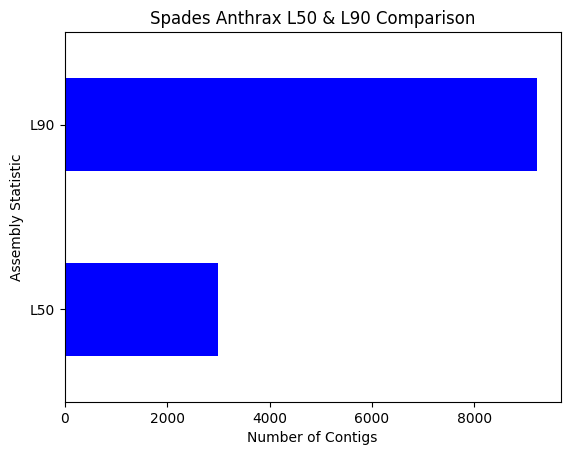

In [55]:
fig, ax = plt.subplots()
df_anth['s_anth'].loc[['L50','L90']].plot.barh(title='Spades Anthrax L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
# ax.legend(assemblerkey)
plt.savefig('anth SPADES Ls')

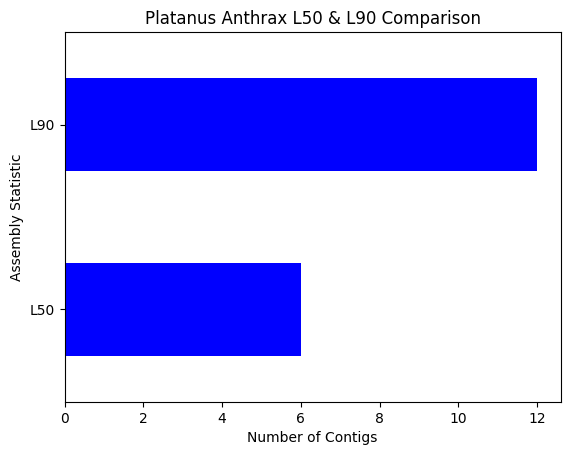

In [56]:
fig, ax = plt.subplots()
df_anth['p_anth'].loc[['L50','L90']].plot.barh(title='Platanus Anthrax L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
# ax.legend(assemblerkey)
plt.savefig('anth PLAT Ls')

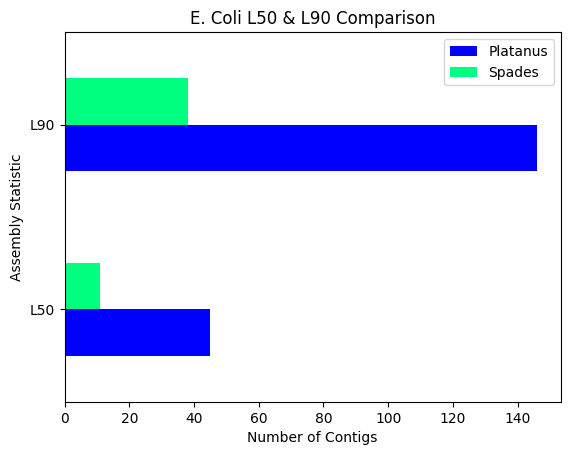

In [57]:
fig, ax = plt.subplots()
df_ecoli.loc[['L50','L90']].plot.barh(title='E. Coli L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
ax.legend(assemblerkey)
plt.savefig('ecoli Ls')

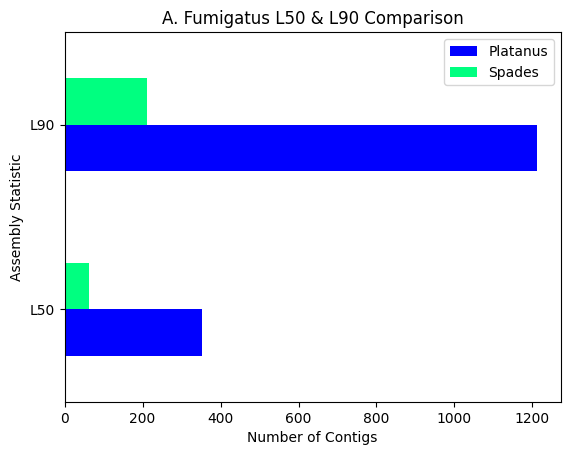

In [58]:
fig, ax = plt.subplots()
df_afumi.loc[['L50','L90']].plot.barh(title='A. Fumigatus L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
ax.legend(assemblerkey)
plt.savefig('afumi Ls')

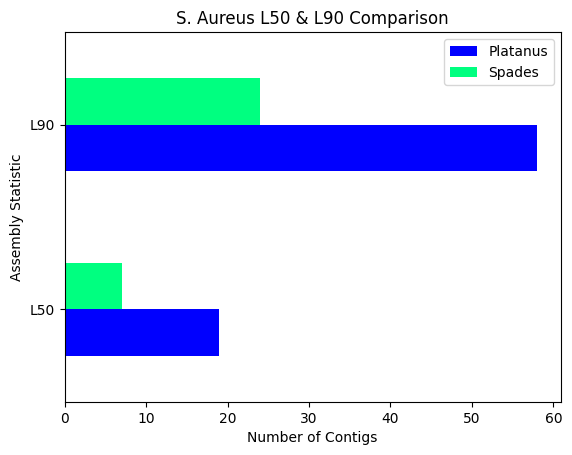

In [59]:
fig, ax = plt.subplots()
df_saur.loc[['L50','L90']].plot.barh(title='S. Aureus L50 & L90 Comparison',ylabel='Assembly Statistic',colormap='winter',ax=ax, xlabel='Number of Contigs')
ax.legend(assemblerkey)
plt.savefig('saur Ls')

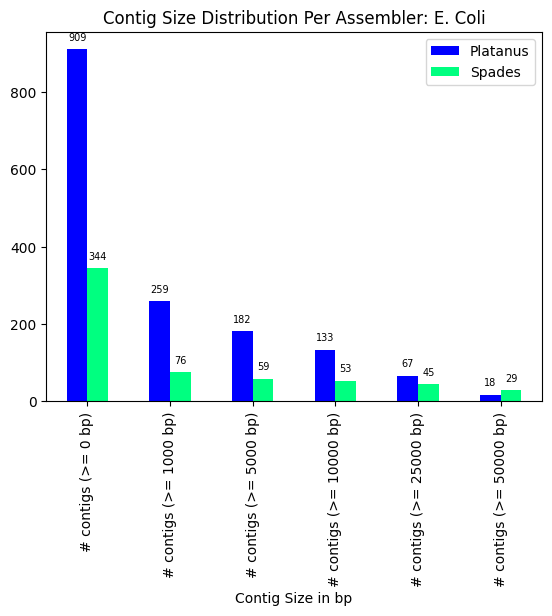

In [60]:
from matplotlib.pyplot import figure
fig, ax = plt.subplots()

df[['p_ecoli','s_ecoli']].loc[['# contigs (>= 0 bp)',
 '# contigs (>= 1000 bp)',
 '# contigs (>= 5000 bp)',
 '# contigs (>= 10000 bp)',
 '# contigs (>= 25000 bp)',
 '# contigs (>= 50000 bp)']].plot(kind='bar', title='Contig Size Distribution Per Assembler: E. Coli', colormap='winter', ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container, fontsize=7, padding=5)
#distribution plot
plt.savefig('ecoli dist')

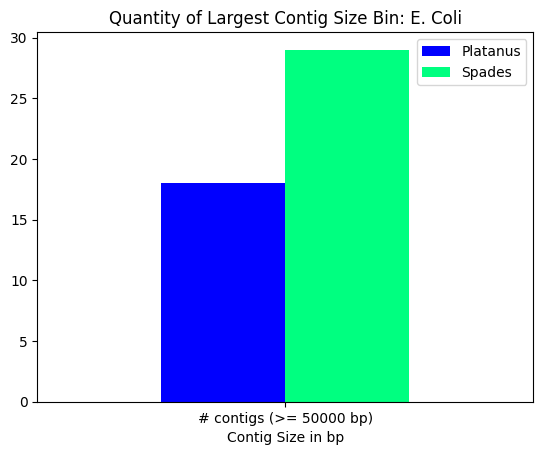

In [61]:
fig, ax = plt.subplots()

df[['p_ecoli','s_ecoli']].loc[[
 '# contigs (>= 50000 bp)']].plot(rot=0,kind='bar', title='Quantity of Largest Contig Size Bin: E. Coli', colormap='winter',ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
# print(df[['p_ecoli','s_ecoli']].loc['Total length'])
plt.savefig('ecoli Lqty')

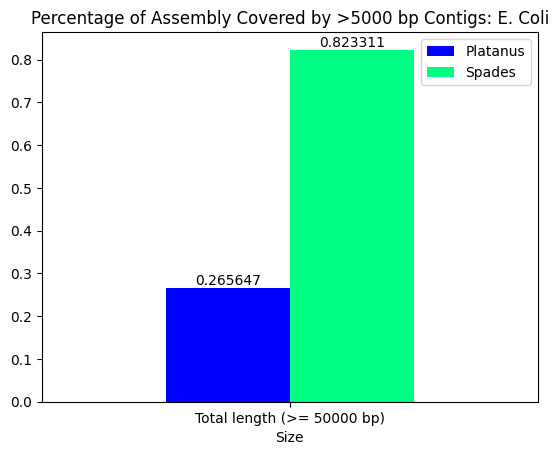

In [62]:
fig, ax = plt.subplots()

df_perc=(df[['p_ecoli','s_ecoli']].loc[['Total length (>= 50000 bp)']])/(df[['p_ecoli','s_ecoli']].loc['Total length'])
df_perc[['p_ecoli','s_ecoli']].loc[['Total length (>= 50000 bp)']].plot(title='Percentage of Assembly Covered by >5000 bp Contigs: E. Coli', ax=ax,xlabel='Size',rot=0,kind='bar', colormap='winter')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('ecoli perc')

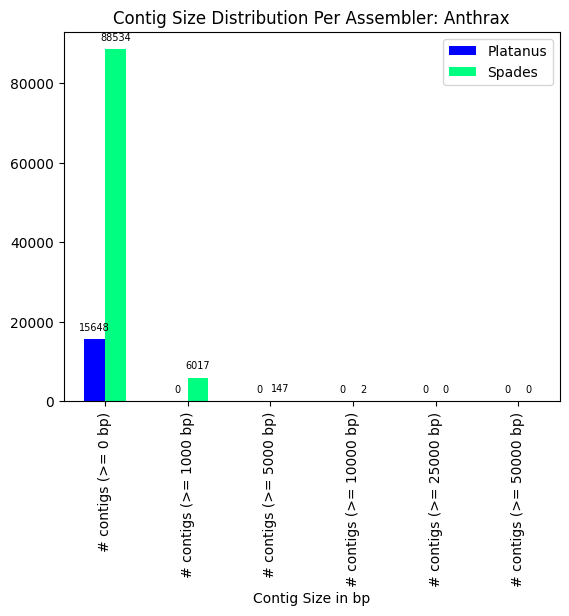

In [63]:
fig, ax = plt.subplots()

df[['p_anth','s_anth']].loc[['# contigs (>= 0 bp)',
 '# contigs (>= 1000 bp)',
 '# contigs (>= 5000 bp)',
 '# contigs (>= 10000 bp)',
 '# contigs (>= 25000 bp)',
 '# contigs (>= 50000 bp)']].plot(kind='bar', title='Contig Size Distribution Per Assembler: Anthrax', colormap='winter', ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container, fontsize=7, padding=5)
plt.savefig('anth dist')

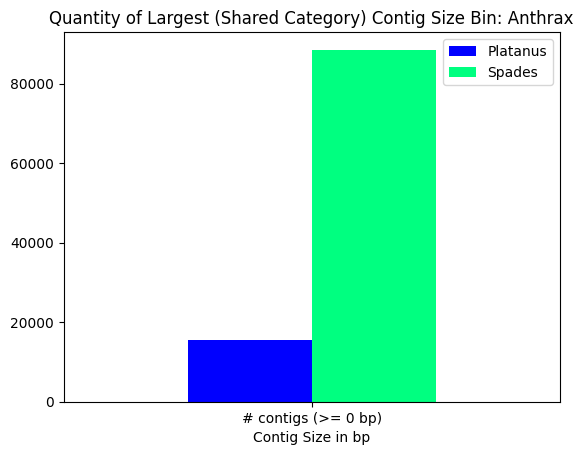

In [64]:
fig, ax = plt.subplots()

df[['p_anth','s_anth']].loc[[
 '# contigs (>= 0 bp)']].plot(rot=0,kind='bar', title='Quantity of Largest (Shared Category) Contig Size Bin: Anthrax', colormap='winter',ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
# print(df[['p_ecoli','s_ecoli']].loc['Total length'])
plt.savefig('anth Lqty')

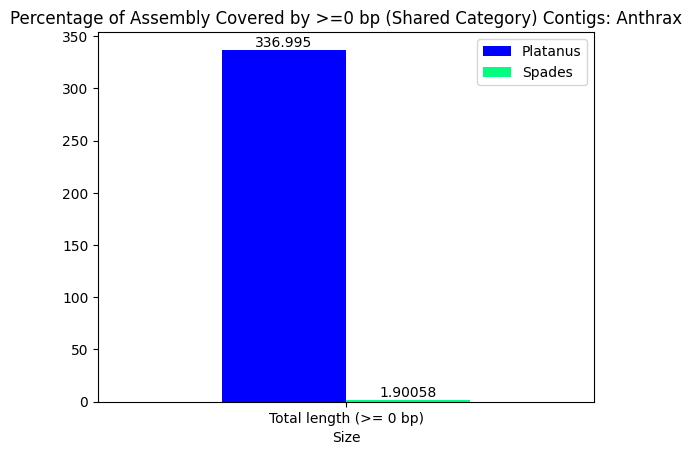

In [65]:
fig, ax = plt.subplots()

df_perc=(df[['p_anth','s_anth']].loc[['Total length (>= 0 bp)']])/(df[['p_anth','s_anth']].loc['Total length'])
df_perc[['p_anth','s_anth']].loc[['Total length (>= 0 bp)']].plot(title='Percentage of Assembly Covered by >=0 bp (Shared Category) Contigs: Anthrax', ax=ax,xlabel='Size',rot=0,kind='bar', colormap='winter')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('anth perc')

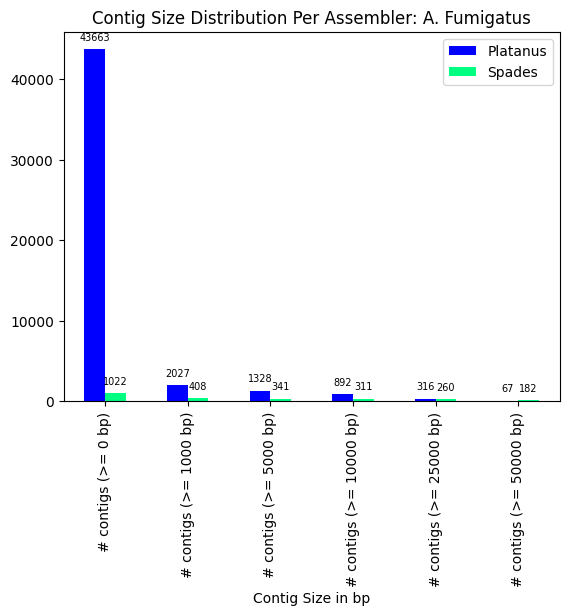

In [66]:
fig, ax = plt.subplots()

df[['p_afumi','s_afumi']].loc[['# contigs (>= 0 bp)',
 '# contigs (>= 1000 bp)',
 '# contigs (>= 5000 bp)',
 '# contigs (>= 10000 bp)',
 '# contigs (>= 25000 bp)',
 '# contigs (>= 50000 bp)']].plot(kind='bar', title='Contig Size Distribution Per Assembler: A. Fumigatus', colormap='winter', ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container, fontsize=7, padding=5)
#distribution plot
plt.savefig('afumi dist')

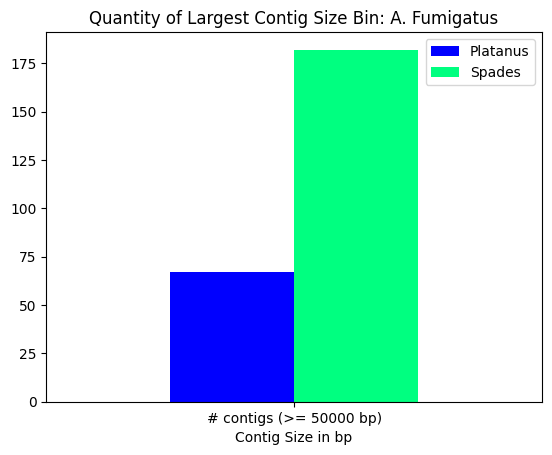

In [67]:
fig, ax = plt.subplots()

df[['p_afumi','s_afumi']].loc[[
 '# contigs (>= 50000 bp)']].plot(rot=0,kind='bar', title='Quantity of Largest Contig Size Bin: A. Fumigatus', colormap='winter',ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
# print(df[['p_ecoli','s_ecoli']].loc['Total length'])
plt.savefig('afumi Lqty')

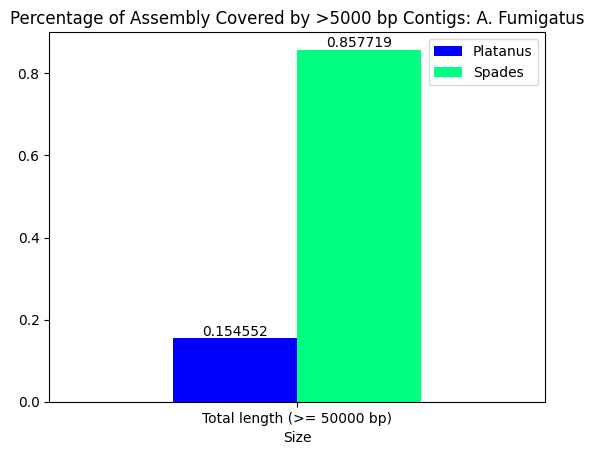

In [68]:
fig, ax = plt.subplots()

df_perc=(df[['p_afumi','s_afumi']].loc[['Total length (>= 50000 bp)']])/(df[['p_afumi','s_afumi']].loc['Total length'])
df_perc[['p_afumi','s_afumi']].loc[['Total length (>= 50000 bp)']].plot(title='Percentage of Assembly Covered by >5000 bp Contigs: A. Fumigatus', ax=ax,xlabel='Size',rot=0,kind='bar', colormap='winter')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('afumi perc')

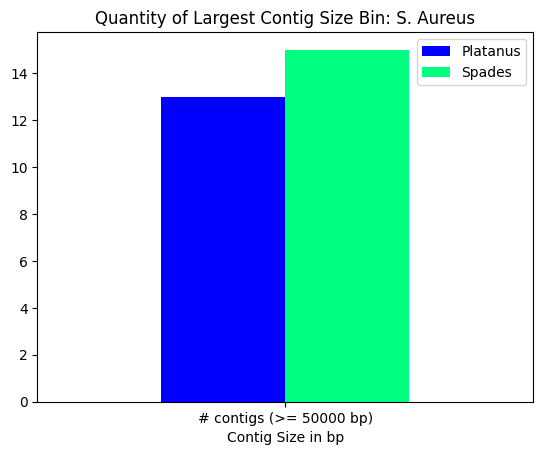

In [69]:
fig, ax = plt.subplots()

df[['p_saur','s_saur']].loc[[
 '# contigs (>= 50000 bp)']].plot(rot=0,kind='bar', title='Quantity of Largest Contig Size Bin: S. Aureus', colormap='winter',ax=ax, xlabel='Contig Size in bp')
ax.legend(assemblerkey)
# print(df[['p_ecoli','s_ecoli']].loc['Total length'])
plt.savefig('saur Lqty')

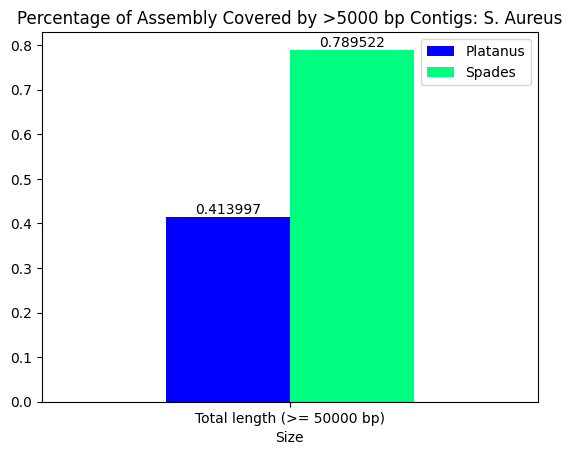

In [70]:
fig, ax = plt.subplots()

df_perc=(df[['p_saur','s_saur']].loc[['Total length (>= 50000 bp)']])/(df[['p_saur','s_saur']].loc['Total length'])
df_perc[['p_saur','s_saur']].loc[['Total length (>= 50000 bp)']].plot(title='Percentage of Assembly Covered by >5000 bp Contigs: S. Aureus', ax=ax,xlabel='Size',rot=0,kind='bar', colormap='winter')
ax.legend(assemblerkey)
for container in ax.containers:
    ax.bar_label(container)
plt.savefig('saur perc')

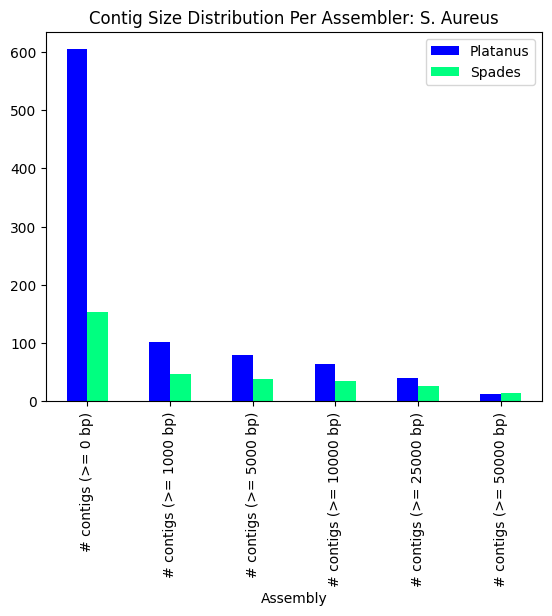

In [71]:
fig, ax = plt.subplots()

df[['p_saur','s_saur']].loc[['# contigs (>= 0 bp)',
 '# contigs (>= 1000 bp)',
 '# contigs (>= 5000 bp)',
 '# contigs (>= 10000 bp)',
 '# contigs (>= 25000 bp)',
 '# contigs (>= 50000 bp)']].plot(kind='bar', title='Contig Size Distribution Per Assembler: S. Aureus', colormap='winter',ax=ax)
ax.legend(assemblerkey)
plt.savefig('saur dist')

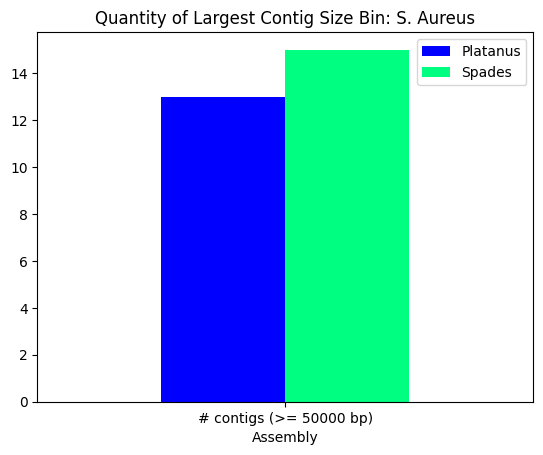

In [72]:
fig, ax = plt.subplots()

df[['p_saur','s_saur']].loc[[
 '# contigs (>= 50000 bp)']].plot(rot=0,kind='bar', title='Quantity of Largest Contig Size Bin: S. Aureus', ax=ax, colormap='winter')
ax.legend(assemblerkey)
plt.savefig('saur Lqty')

In [73]:
# df.loc['GC (%)']/[50.8,50.8,32.88,32.88]

In [74]:
# df.loc['Maintained GC (%)'] = df.loc['GC (%)']/[50.8,50.8,32.88,32.88]

# df.loc['Lost GC (%)'] = 1-df.loc['Maintained GC (%)']
# df

In [75]:

# ax = df.loc[['Maintained GC (%)','Lost GC (%)']].plot.pie(title='GC% Retention for Spades and Platanus for E. Coli and S. Aureus',ylabel='',xlabel=['p_ecoli','s_ecoli','p_saur','s_saur'],shadow=True, explode=[0.05, 0.05],subplots=True, figsize=(60,10), colormap = 'winter')
# better written statistc no immediate difference


In [76]:
#yeast or fungus

In [77]:
df

,p_ecoli,s_ecoli,p_saur,s_saur,p_afumi,s_afumi,p_anth,s_anth
Assembly,,,,,,,,
# contigs (>= 0 bp),909.00,344.00,604.00,154.00,43663.00,1022.00,15648.00,88534.00
# contigs (>= 1000 bp),259.00,76.00,102.00,47.00,2027.00,408.00,0.00,6017.00
# contigs (>= 5000 bp),182.00,59.00,80.00,39.00,1328.00,341.00,0.00,147.00
# contigs (>= 10000 bp),133.00,53.00,65.00,35.00,892.00,311.00,0.00,2.00
# contigs (>= 25000 bp),67.00,45.00,41.00,26.00,316.00,260.00,0.00,0.00
# contigs (>= 50000 bp),18.00,29.00,13.00,15.00,67.00,182.00,0.00,0.00
Total length (>= 0 bp),4625510.00,4610159.00,2813070.00,2774490.00,29691099.00,28808703.00,2609354.00,30802480.00
Total length (>= 1000 bp),4508909.00,4556970.00,2738143.00,2757497.00,27158034.00,28668064.00,0.00,11978922.00
Total length (>= 5000 bp),4317780.00,4520913.00,2671727.00,2734745.00,25244918.00,28499701.00,0.00,913389.00


In [78]:
df.loc['Runtime'] = [20+(25.836/60),19+(46.428/60),20+(18.004/60),20,6+(27.989/60),62+(37.922/60),68+(45.120/60),136+(42.997/60)]
df

,p_ecoli,s_ecoli,p_saur,s_saur,p_afumi,s_afumi,p_anth,s_anth
Assembly,,,,,,,,
# contigs (>= 0 bp),9.090000e+02,3.440000e+02,6.040000e+02,154.00,4.366300e+04,1.022000e+03,15648.000,8.853400e+04
# contigs (>= 1000 bp),2.590000e+02,7.600000e+01,1.020000e+02,47.00,2.027000e+03,4.080000e+02,0.000,6.017000e+03
# contigs (>= 5000 bp),1.820000e+02,5.900000e+01,8.000000e+01,39.00,1.328000e+03,3.410000e+02,0.000,1.470000e+02
# contigs (>= 10000 bp),1.330000e+02,5.300000e+01,6.500000e+01,35.00,8.920000e+02,3.110000e+02,0.000,2.000000e+00
# contigs (>= 25000 bp),6.700000e+01,4.500000e+01,4.100000e+01,26.00,3.160000e+02,2.600000e+02,0.000,0.000000e+00
# contigs (>= 50000 bp),1.800000e+01,2.900000e+01,1.300000e+01,15.00,6.700000e+01,1.820000e+02,0.000,0.000000e+00
Total length (>= 0 bp),4.625510e+06,4.610159e+06,2.813070e+06,2774490.00,2.969110e+07,2.880870e+07,2609354.000,3.080248e+07
Total length (>= 1000 bp),4.508909e+06,4.556970e+06,2.738143e+06,2757497.00,2.715803e+07,2.866806e+07,0.000,1.197892e+07
Total length (>= 5000 bp),4.317780e+06,4.520913e+06,2.671727e+06,2734745.00,2.524492e+07,2.849970e+07,0.000,9.133890e+05


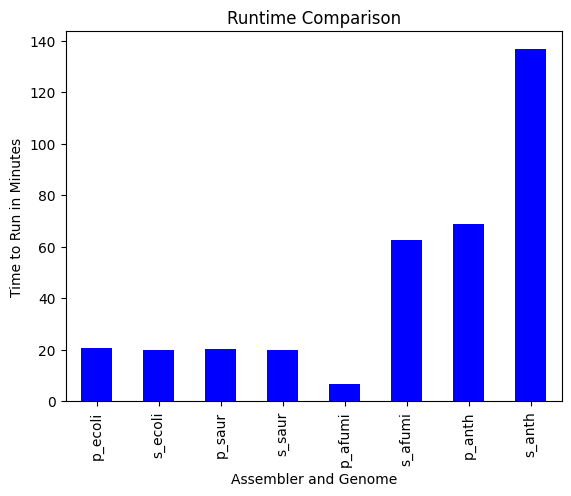

In [79]:

df.loc['Runtime'].plot(kind='bar', xlabel='Assembler and Genome', ylabel='Time to Run in Minutes', title='Runtime Comparison', colormap='winter')
plt.savefig('Runtime')